# 监督学习 vs 无监督学习
这一章我们来学习一下无监督学习，在前面的算法中我们都是通过$x$生成对应的$\hat{y}$和$y$的损失来优化模型,真实标签y对模型起到了监督的作用，故被称为**监督学习**。

而在接下来的算法中，由于没有监督信号，而是通过样本的特征寻找样本之间的关系，这一过程被称为**无监督学习**

# K-means Clustering

K均值聚类的本质是样本通过距离来划分K中类别，同一种类别的距离到类别中心的距离应该是要比不同类别更近。

但是我们一开始是不知道每一类的中心是在哪的，所以我们一开始就随机选择了K个中心，然后以总距离为损失函数，不断优化模型

### 核心公式

#### 1. **数据集定义**
假设数据集为：
$$
\mathcal{D} = \{\boldsymbol{x}_1, \dots, \boldsymbol{x}_N\}
$$
其中每个样本 $\boldsymbol{x}_i \in \mathbb{R}^d$，特征维度为 $d$。最终聚类的个数 $K$ 是提前指定的。

#### 2. **簇的定义**
对于第 $i$ 个簇 $C_i$，其定义为所有到质心 $\boldsymbol{\mu}_i$ 的距离小于或等于其他质心距离的样本集合：
$$
C_i = \{\boldsymbol{x}_j \in \mathcal{D} \mid \forall l \neq i, \, d(\boldsymbol{x}_j, \boldsymbol{\mu}_i) \leq d(\boldsymbol{x}_j, \boldsymbol{\mu}_l)\}
$$
其中 $d(\cdot, \cdot)$ 表示两点之间的距离（通常为欧氏距离）。

#### 3. **目标函数**
K 均值的目标是最小化所有样本到其所属簇中心的平方距离之和，即损失函数：
$$
\mathcal{L}(C_1, \dots, C_K) = \sum_{i=1}^K \sum_{\boldsymbol{x} \in C_i} \| \boldsymbol{x} - \boldsymbol{\mu}_i \|^2
$$
也可以写成：
$$
\mathcal{L}(C_1, \dots, C_K) = \sum_{i=1}^K \sum_{j=1}^N \mathbb{I}(\boldsymbol{x}_j \in C_i) \cdot d(\boldsymbol{x}_j, \boldsymbol{\mu}_i)
$$
其中 $\mathbb{I}(\cdot)$ 是指示函数，当条件成立时取值为 1，否则为 0。

#### 4. **质心更新规则**
为了最小化损失函数 $\mathcal{L}$，我们需要对质心 $\boldsymbol{\mu}_i$ 求偏导，并令其为零。具体步骤如下：

##### (1) 对损失函数求偏导
损失函数关于 $\boldsymbol{\mu}_i$ 的偏导为：
$$
\frac{\partial \mathcal{L}}{\partial \boldsymbol{\mu}_i} = \sum_{\boldsymbol{x} \in C_i} \frac{\partial \| \boldsymbol{x} - \boldsymbol{\mu}_i \|^2}{\partial \boldsymbol{\mu}_i}
$$

##### (2) 计算单个样本的偏导
对于单个样本 $\boldsymbol{x}$，有：
$$
\| \boldsymbol{x} - \boldsymbol{\mu}_i \|^2 = (\boldsymbol{x} - \boldsymbol{\mu}_i)^T (\boldsymbol{x} - \boldsymbol{\mu}_i)
$$
对其求偏导：
$$
\frac{\partial \| \boldsymbol{x} - \boldsymbol{\mu}_i \|^2}{\partial \boldsymbol{\mu}_i} = \frac{\partial}{\partial \boldsymbol{\mu}_i} \left[ (\boldsymbol{x} - \boldsymbol{\mu}_i)^T (\boldsymbol{x} - \boldsymbol{\mu}_i) \right] = -2 (\boldsymbol{x} - \boldsymbol{\mu}_i)
$$

##### (3) 整体偏导
将上述结果代入整体损失函数的偏导中：
$$
\frac{\partial \mathcal{L}}{\partial \boldsymbol{\mu}_i} = \sum_{\boldsymbol{x} \in C_i} \left( -2 (\boldsymbol{x} - \boldsymbol{\mu}_i) \right) = -2 \sum_{\boldsymbol{x} \in C_i} (\boldsymbol{x} - \boldsymbol{\mu}_i)
$$

##### (4) 令偏导为零
为了最小化损失函数，令 $\frac{\partial \mathcal{L}}{\partial \boldsymbol{\mu}_i} = 0$，得到：
$$
\sum_{\boldsymbol{x} \in C_i} (\boldsymbol{x} - \boldsymbol{\mu}_i) = 0
$$
进一步化简：
$$
\sum_{\boldsymbol{x} \in C_i} \boldsymbol{x} = |C_i| \cdot \boldsymbol{\mu}_i
$$
因此，质心 $\boldsymbol{\mu}_i$ 的更新公式为：
$$
\boldsymbol{\mu}_i = \frac{1}{|C_i|} \sum_{\boldsymbol{x} \in C_i} \boldsymbol{x}
$$

---

## 基于K均值的点聚类

### 导包

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#### 先读取一下数据集

In [4]:
dataset=np.loadtxt('kmeans_data.csv',delimiter=',')

print("数据集大小: ",len(dataset))

数据集大小:  80


### 数据可视化

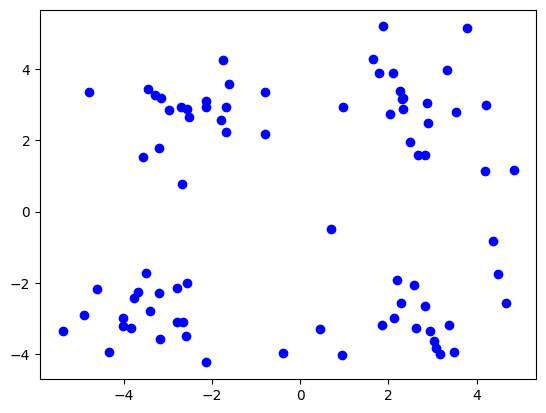

In [ ]:
#绘图函数
def show_cluster(dataset,cluster,centriods=None):
    #dataset：数据集
    #centriods：聚类中心点的坐标
    #cluster: 每个样本所属的数据的类别
    #采用不同的颜色来区分类别
    colors=['blue','red','green','purple']
    markers=['o','^','s','d']

    K=len(np.unique(cluster))
    for i in range(K):
        plt.scatter(dataset[cluster==i,0],dataset[cluster==i,1],color=colors[i],marker=markers[i])
    
    #画出中心点
    if centriods is not None:
        plt.scatter(centriods[:,0],centriods[:,1],color=colors[:K],marker='+',s=150)  #难怪
    
    plt.show()

# 初始的时候不区分类别
show_cluster(dataset,np.zeros(len(dataset),dtype=int))

In [6]:
def random_init(dataset,K):
    # 随机选取是不重复的
    idx=np.random.choice(np.arange(len(dataset)),size=K,replace=False)
    return dataset[idx]


In [7]:
def Kmeans(datasetm,K,init_cent):
    #dataset: 数据集
    #K: 分类数
    #init_cent： 初始化中心点
    centroids=init_cent(dataset,K)
    cluster=np.zeros(len(dataset),dtype=int)
    changed=True
    # 开始迭代
    itr=0
    while changed:
        changed=False
        loss=0
        for i,data in enumerate(dataset):
            #寻找最近的中心点
            dis=np.sum((centroids-data)**2,axis=-1)
            k=np.argmin(dis)
            #更新当前样本所属的聚类
            if cluster[i]!=k:
                cluster[i]=k
                changed=True  #如果所有都没有改变，说明每一个值都找到了它的类了
            #计算损失
            loss+=np.sum((data-centroids[k])**2)
        
        #绘图
        print(f'Iteration{itr},Loss{loss:.3f}')
        show_cluster(dataset,cluster,centroids)
        #更新中心点
        for i in range(K):
            centroids[i]=np.mean(dataset[cluster==i],axis=0)
        itr+=1
    return centroids,cluster

Iteration0,Loss711.336


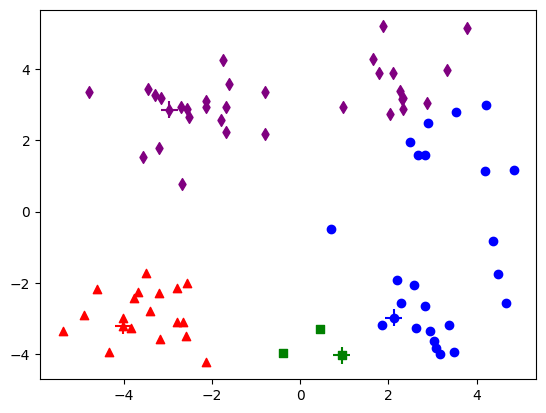

Iteration1,Loss409.495


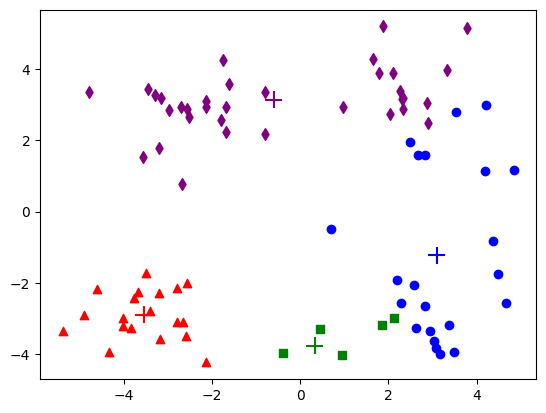

Iteration2,Loss395.264


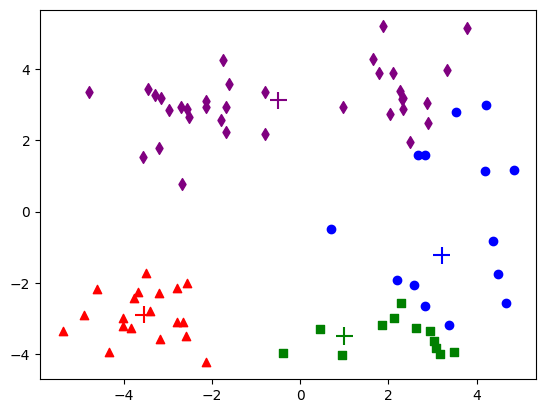

Iteration3,Loss346.068


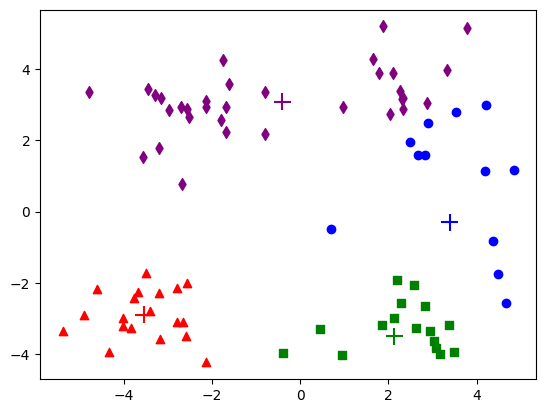

Iteration4,Loss294.244


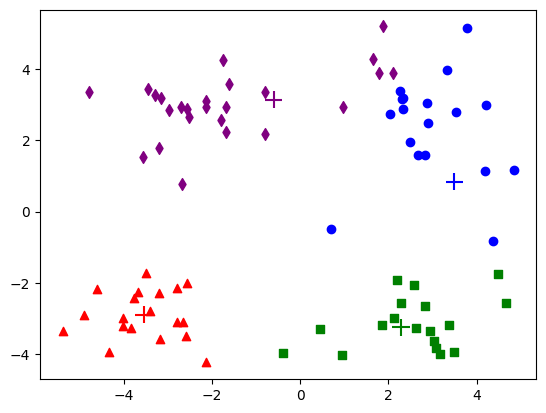

Iteration5,Loss178.808


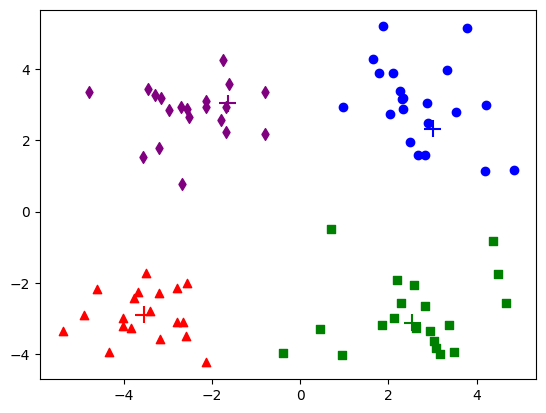

Iteration6,Loss151.090


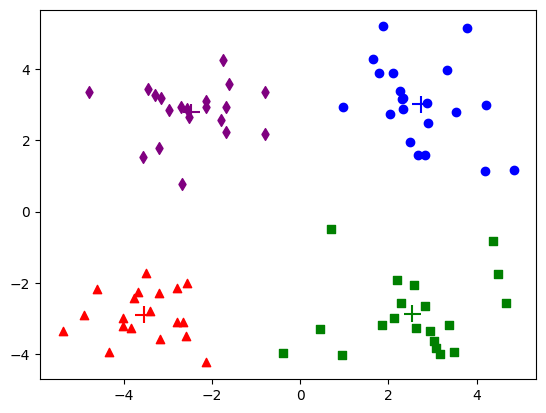

In [8]:
np.random.seed(0)
cent, cluster = Kmeans(dataset, 4, random_init)

#### **一、K-means 算法的局限性**

1. **对初始中心点的敏感性：**
   - K-means 算法的结果对初始聚类中心的选择非常敏感。
   - 如果初始中心点选择不当，算法容易收敛到局部最小值，导致不同的划分结果。

2. **随机种子的影响：**
   - 当聚类个数 $ k $ 和数据量较大时，K-means 算法运行时间较长。
   - 反复调整随机种子以寻找最优划分非常不便。

---

#### **二、K-means++ 的改进**

1. **目标：**
   - 提出一种新的初始中心点选择方法，减少算法对随机种子的依赖。

2. **核心思想：**
   - K-means++ 算法从所有样本中随机选取一个点作为第一个聚类的中心点。
   - 直观上，希望初始的中心点尽可能分散，以覆盖数据分布的各个区域。

3. **具体步骤：**
   - 假设目前已有的 $ k $ 个中心点为 $ \mu_1, \dots, \mu_k $。
   - 对于样本 $ x $，计算其到当前最近中心点的距离平方：
     $$
     D^2(x) = \min_{i=1}^k \|x - \mu_i\|^2
     $$
   - 样本 $ x $ 被选为第 $ k+1 $ 个中心点的概率与其到当前中心点距离的平方成正比：
     $$
     P(\mu_{k+1} = x) = \frac{D^2(x)}{\sum_x D^2(x)}
     $$
     - 分母是对整个数据集求和，确保所有样本被选为中心点的概率之和为 1。

4. **重复过程：**
   - 重复上述步骤，直到选出 $ K $ 个聚类中心为止。

---


In [ ]:
def kmeanspp_init(dataset,K):
    # 随机第一个中心点
    idx=np.random.choice(np.arange(len(dataset)))
    centroids=dataset[idx][None]
    for k in range(1,K):
        d=[]
        #计算每一个点到当前中心点的距离
        for data in dataset:
            dis=np.sum((centroids-data)**2,axis=-1)
            #取最短距离的平方
            d.append(np.min(dis)**2)
        
        #归一化
        d=np.array(d)
        d/=np.sum(d)
        #按概率选取下一个中心点
        cent_id=np.random.choice(np.arange(len(dataset)),p=d)
        cent=dataset[cent_id]
        centroids=np.concatenate([centroids,cent[None]],axis=0)   #cent.shape = (2,)加上None后：cent.shape → (1, 2) 这里面dataset里面每一个子项也是（2，1）
                                                                  #但是为了画图好显示，所以我们给他变成一个二维数组 [[],[]] 
    return centroids

Iteration0,Loss457.848


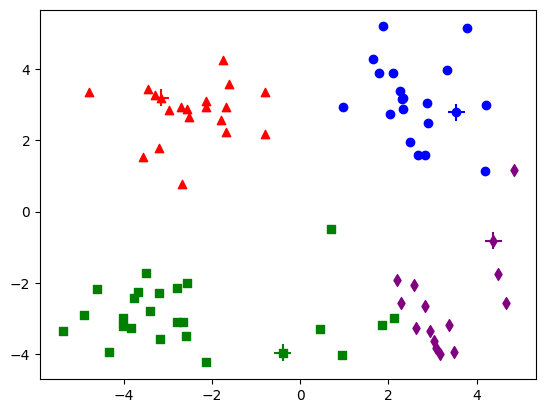

Iteration1,Loss177.348


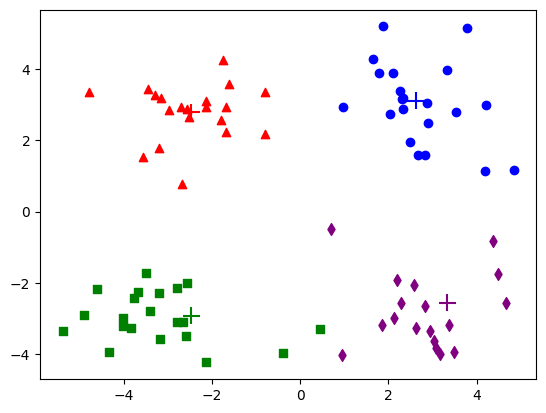

Iteration2,Loss152.255


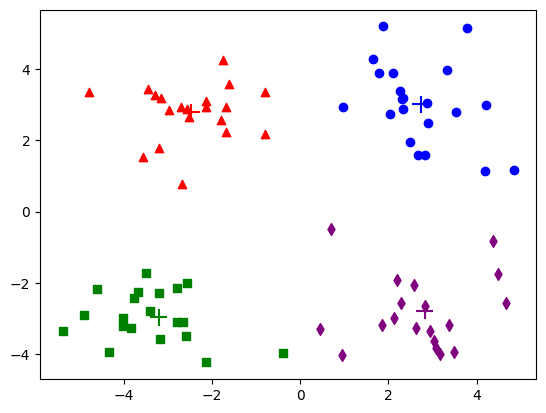

Iteration3,Loss151.273


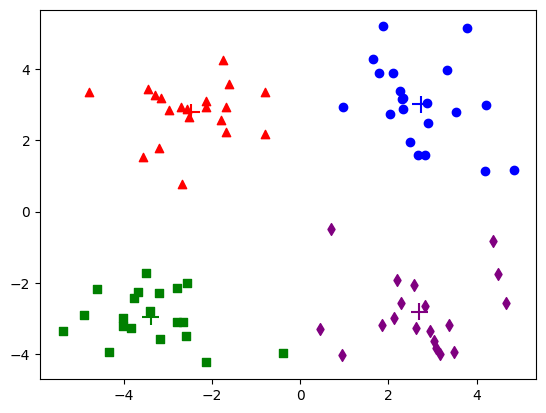

In [15]:
cent, cluster = Kmeans(dataset, 4, kmeanspp_init)

## 最后

在上面的平面点集任务中，我们选用了最简单的欧氏距离。而当数据的特征维度较高时，简单的欧氏距离会面临维数灾难问题。

简单来说，在高维空间中，数据点会变得越来越稀疏，任意两个数据点之间的欧氏距离都差别不大，欧氏距离失去了判断相似度的功能。

因此，当数据的特征维度更高、关系更复杂的时候，距离函数需要精心设计，甚至要通过神经网络训练得到。

因此，k均值聚类算法通常**不会作为复杂聚类任务**的**第一步**，而是在其他算法挑选出数据的关键特征、得到合适的距离函数后，再进行**最后的聚类工作**。